# Histology Tissue Classification Project (HTCP)

(C) K. Mader / U. Michelucci 2018-2019

# Overview
The dataset serves as a much more interesting MNIST or CIFAR10 problem for biologists by focusing on histology tiles from patients with colorectal cancer. In particular, the data has 8 different classes of tissue (but Cancer/Not Cancer can also be an interesting problem).

The dataset has been adapted for the course by K. Mader (kevin.mader@gmail.com), and is available on kaggle: https://goo.gl/26zj41

# Challenge
- Classify tiles correctly into one of the eight classes
- Which classes are most frequently confused?
- What features can be used (like texture, see scikit-image) to improve classification?
- How can these models be applied to the much larger 5000x5000 models? 
How can this be done efficiently?

# Acknowledgements
The dataset has been copied from Zenodo: https://zenodo.org/record/53169#.W6HwwP4zbOQ

made by: Kather, Jakob Nikolas; Zöllner, Frank Gerrit; Bianconi, Francesco; Melchers, 
    Susanne M; Schad, Lothar R; Gaiser, Timo; Marx, Alexander; Weis, Cleo-Aron

The copy here is to make it more accessible to Kaggle users and allow kernels 
providing basic analysis of the data

Content
This data set represents a collection of textures in histological images of 
human colorectal cancer. It contains two files:

    Kather_texture_2016_image_tiles_5000.zip": a zipped folder containing 5000 
    histological images of 150 * 150 px each (74 * 74 µm). Each image belongs 
    to exactly one of eight tissue categories (specified by the folder name). 
    
    Kather_texture_2016_larger_images_10.zip": a zipped folder containing 10 
    larger histological images of 5000 x 5000 px each. These images contain 
    more than one tissue type. Image format

All images are RGB, 0.495 µm per pixel, digitized with an Aperio ScanScope 
(Aperio/Leica biosystems), magnification 20x. Histological samples are fully 
anonymized images of formalin-fixed paraffin-embedded human colorectal 
adenocarcinomas (primary tumors) from our pathology archive (Institute of Pathology, 
University Medical Center Mannheim, Heidelberg University, Mannheim, Germany).

Additionally the files has been prepared to resemble the MNIST dataset, meaning that you will also find the following files

- HTCP_8_8_L - 
- HTCP_8_8_RGB -
- HTCP_28_28_L -
- HTCP_28_28_RGB - 
- HTCP_64_64_L

# Ethics statement
All experiments were approved by the institutional ethics board (medical ethics board II, University Medical Center Mannheim, Heidelberg University, Germany; approval 2015-868R-MA). The institutional ethics board waived the need for informed consent for this retrospective analysis of anonymized samples. All experiments were carried out in accordance with the approved guidelines and with the Declaration of Helsinki.

# More information / data usage
For more information, please refer to the following article. Please cite this article when using the data set.

Kather JN, Weis CA, Bianconi F, Melchers SM, Schad LR, Gaiser T, Marx A, Zollner F: Multi-class texture analysis in colorectal cancer histology (2016), Scientific Reports (in press)

# Contact
For questions, please contact: Dr. Jakob Nikolas Kather http://orcid.org/0000-0002-3730-5348 ResearcherID: D-4279-2015

# Download the data

The dataset is composed of two datasets:

- The small images that will be used to test the classification models
- The big microscope images (5000x5000)

The first dataset is quite small and can be found in the same github repository where you find this file. The second are much bigger (250 Mb and 700 Mb) and cannot be uploaded on github, so you can get them on  kaggle: https://goo.gl/hkRSke  

# Ideas for the project

The project can be tackled in several ways and at several levels. Here are some ideas for you to tackle at different difficulty levels.

A few general hints:

- Accuracy is a nice metric, but in this case the confusion matrix is more useful. Check which metric is the most ideal for this problem (you could use others)
- If detecting TUMOR proces too hard, try to detect other tissue types. For example ADIPOSE. Some are much easier to detect than others. 
- __REMEMBER__: detecting __ONE__ type of tissue does not necessarly mean being able to detec __ALL__ type of tissues well ;-)
- __REMEMBER__: getting a high accuracy is __NOT__ the goal of the project. The goal is to put you in a real-life situation where you have to be creative to solve a relevant problem. Is not easy and there are not easy ways of solving it.

__OVER ALL REMEMBER: HAVE FUN!__

## Easy

- Use the gray level 28x28 images and consider only two classes: TUMOR and (for example) ADIPOSE. Build with a classifier with a neural network of your choice (probably one neuron would be enough). Similary to what we have done in the class with the digits 1 and 2 from the MNIST dataset.
- Try to build a classifier using the distribution of gray levels in each class. You should take all the images of a specific class and plot the gray level distributions to see if you can use it.
- Try to build a classifier using the distribution of each color channel levels in each class. You should take all the images of a specific class and plot the color channel level distributions to see if you can use it.
- Build a model that gives as output not only the predicted classes, but all 8 with the probability each has sorted from the highest probability to the lowest.


## Medium
- Use the gray level 28x28 images and consider all the classes. Try to build a classifier using a neural network with several layers. After a first test, with hyperparameter tuning try to find the best model for the problem. Consider the following hyperparameters
    - learning rate
    - number of layers / Number of neurons in each layer
    - mini-batch size
    - number of epochs
    - activation function (maybe swish helps?)
- After having tried what just described in the previous point, try to see if you get better results with the 64x64 gray images. And try with the 8x8 to see if they are usable to get better results (they are not, but try).



## Hard
- If you have studied the color distribution in the __Easy__ exercise part, try to build your first pipeline of models: first a manually build classifier (based on distributions) to eliminate easy to detect classes and then a network for the most complex cases.

## Fun
- After having trained a model to classify images, build a "probability map" over the 5000 pixels x 5000 pixels images to detect specific tissue types. A way in which you could do it is to make sliding window on the big image, and let the model give the probability of each slide and then plot an overlay on the big image with (for example) the color intensity proprortional to the probability your model is predicting. 

__WARNING__: this will take some time, but it is really be fun!

# Helper Functions

In [1]:
def plot_image(some_image):
    
    some_digit_image = some_image.values.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

In [2]:
def get_label_name(idx):
    
    if (idx == 1):
        return '(1) TUMOR'
    elif (idx == 2):
        return '(2) STROMA'
    elif (idx == 3):
        return '(3) COMPLEX'
    elif (idx == 4):
        return '(4) LYMPHO'
    elif (idx == 5):
        return '(5) DEBRIS'
    elif (idx == 6):
        return '(6) MUCOSA'
    elif (idx == 7):
        return '(7) ADIPOSE'
    elif (idx == 8):
        return '(8) EMPTY'

# Load the data

In [3]:
%matplotlib inline
from glob import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from random import randint

from skimage.io import imread #read images from files
import seaborn as sns

import tensorflow as tf

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, accuracy_score
import time

In [4]:
def guess_image_dim(in_shape):
    side_len = int(np.sqrt(in_shape))
    if np.abs(in_shape-side_len*side_len)<2:
        return (int(side_len), int(side_len))
    else:
        side_len = int(np.sqrt(in_shape/3))
        return (side_len, side_len, 3)
csv_dir = os.path.join('.', 'data')

In [5]:
all_files = sorted(glob(os.path.join(csv_dir, 'HTCP*.csv')), 
                   key=lambda x: os.stat(x).st_size)
all_df_dict = {os.path.splitext(os.path.basename(x))[0]: pd.read_csv(x) for x in all_files}
for c_key in all_df_dict.keys():
    print(c_key, 'vector length:',  
          all_df_dict[c_key].shape[1], '->', 
          guess_image_dim(all_df_dict[c_key].shape[1]))

HTCP_8_8_L vector length: 65 -> (8, 8)
HTCP_8_8_RGB vector length: 193 -> (8, 8, 3)
HTCP_28_28_L vector length: 785 -> (28, 28)
HTCP_28_28_RGB vector length: 2353 -> (28, 28, 3)
HTCP_64_64_L vector length: 4097 -> (64, 64)


In [6]:
all_files

['./data/HTCP_8_8_L.csv',
 './data/HTCP_8_8_RGB.csv',
 './data/HTCP_28_28_L.csv',
 './data/HTCP_28_28_RGB.csv',
 './data/HTCP_64_64_L.csv']

In [7]:
data = pd.read_csv('data/HTCP_28_28_L.csv')

Let's create an array with labels (not yet one-encoded) and one for the images.

In [8]:
labels = data['label']
data = data.drop(['label'], axis = 1)

Let's look at the first records of the dataframe

In [9]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,101,110,154,160,95,44,139,184,164,160,...,128,103,73,72,75,152,130,96,133,159
1,67,66,69,76,80,57,46,67,90,77,...,57,58,65,74,80,81,83,77,75,73
2,127,137,121,140,170,111,128,117,60,105,...,69,90,100,143,119,148,140,193,146,97
3,80,90,101,106,120,100,99,66,63,91,...,154,131,109,97,102,71,93,120,84,62
4,153,141,121,132,110,131,119,99,101,91,...,134,117,121,136,178,192,210,189,149,155


The datasets has 5000 images, each 28x28 in gray

In [10]:
data.shape

(5000, 784)

## Examples of each class

Let's plot an image of each class

In [11]:
labels.unique()

array([2, 5, 7, 6, 8, 1, 4, 3])

In [12]:
def get_random_element_with_label (data, lbls, lbl):
    tmp = lbls == lbl
    subset = data[tmp]
    return subset.iloc[randint(1,subset.shape[0])]

labels_overview = np.empty([10,784])
for i in range (1,9):
    img = get_random_element_with_label(data, labels, i)
    labels_overview[i,:] = img

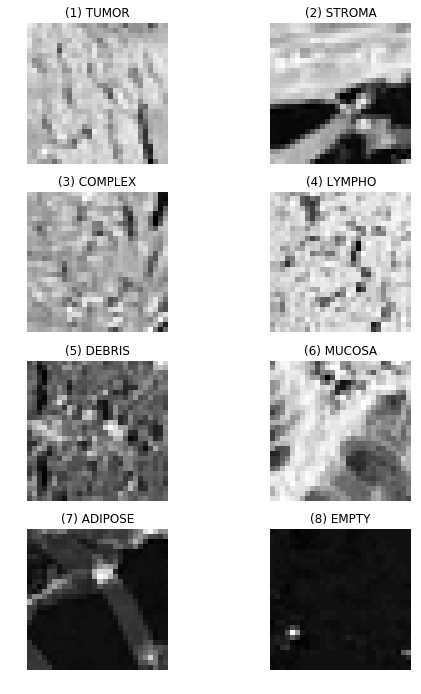

In [13]:
f = plt.figure(figsize=(8,15));
count = 1
for i in range(1,9):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.2)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[i,:].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")

# Work with the original images

Let's first load the images and their information (metadata)

In [14]:
base_tile_dir = os.path.join('data', 'kather_texture_2016_image_tiles_5000')
print(base_tile_dir)

tile_df = pd.DataFrame({
    'path': glob(os.path.join(base_tile_dir, '*', '*.tif'))
})

tile_df['file_id'] = tile_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
tile_df['cell_type'] = tile_df['path'].map(lambda x: os.path.basename(os.path.dirname(x))) 
tile_df['cell_type_idx'] = tile_df['cell_type'].map(lambda x: int(x.split('_')[0]))
tile_df['cell_type'] = tile_df['cell_type'].map(lambda x: x.split('_')[1])
tile_df['full_image_name'] = tile_df['file_id'].map(lambda x: x.split('_Row')[0])
tile_df['full_image_row'] = tile_df['file_id'].map(lambda x: int(x.split('_')[-3]))
tile_df['full_image_col'] = tile_df['file_id'].map(lambda x: int(x.split('_')[-1]))
tile_df.sample(3)

data/kather_texture_2016_image_tiles_5000


,path,file_id,cell_type,cell_type_idx,full_image_name,full_image_row,full_image_col
457,data/kather_texture_2016_image_tiles_5000/02_S...,1272E_CRC-Prim-HE-02_011.tif_Row_151_Col_1,STROMA,2,1272E_CRC-Prim-HE-02_011.tif,151,1
2603,data/kather_texture_2016_image_tiles_5000/03_C...,6817_CRC-Prim-HE-08_013.tif_Row_1_Col_1,COMPLEX,3,6817_CRC-Prim-HE-08_013.tif,1,1
887,data/kather_texture_2016_image_tiles_5000/06_M...,10D41_CRC-Prim-HE-09_001.tif_Row_2401_Col_1651,MUCOSA,6,10D41_CRC-Prim-HE-09_001.tif,2401,1651


In [15]:
tile_df.describe(exclude=[np.number])

,path,file_id,cell_type,full_image_name
count,5000,5000,5000,5000
unique,5000,5000,8,4995
top,data/kather_texture_2016_image_tiles_5000/03_C...,12833_CRC-Prim-HE-06_028.tif_Row_151_Col_1,COMPLEX,1411C_CRC-Prim-HE-06_005.tif
freq,1,1,625,2


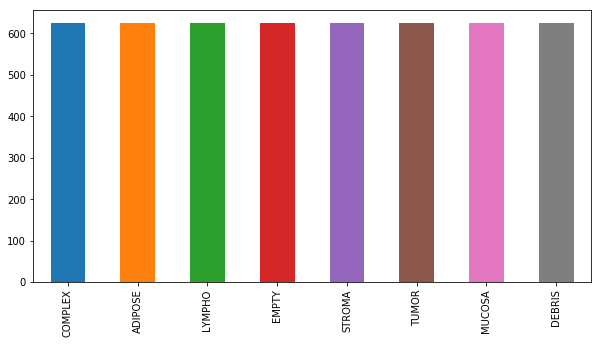

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

In [17]:
# load in all of the images
from skimage.io import imread
tile_df['image'] = tile_df['path'].map(imread)

In [18]:
tile_df['path'].iloc[0]

'data/kather_texture_2016_image_tiles_5000/02_STROMA/14389_CRC-Prim-HE-07_026.tif_Row_751_Col_151.tif'

# Show a few in each category

__NOTE__: the images are here 150x150, so slightly bigger than the gray level ones, that are 28x28.

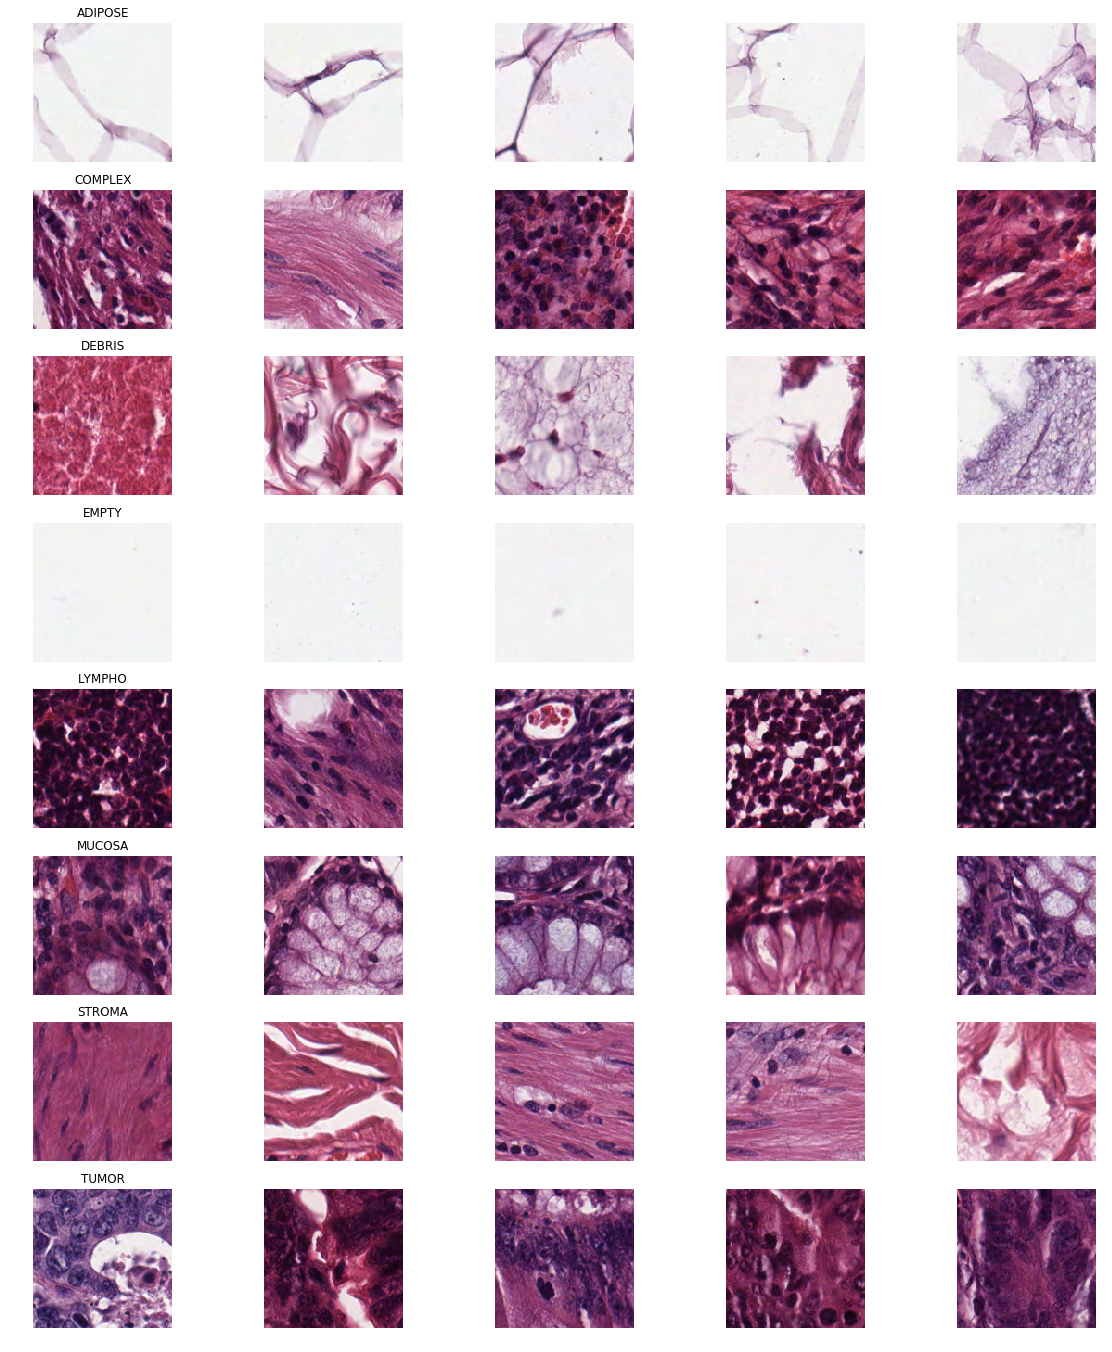

In [19]:
n_samples = 5
fig, m_axs = plt.subplots(8, n_samples, figsize = (4*n_samples, 3*8))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

# Load the 5000x5000 images

__NOTE__: keep in mind that each image is roughly 70 Mb, so if you want to try to identify the location of each type of tissue you can try loading one at a time.

In [20]:
base_tile_dir = os.path.join('data', 'Kather_texture_2016_larger_images_10')

big_image_df = pd.DataFrame({
    'path': glob(os.path.join(base_tile_dir,  '*.tif'))
})

print(big_image_df.iloc[0])

path    data/Kather_texture_2016_larger_images_10/CRC-...
Name: 0, dtype: object


In [21]:
big_image_df['image'] = big_image_df['path'].map(plt.imread)

In [22]:
big_image_df.head()

,path,image
0,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[153, 85, 132], [154, 92, 139], [153, 91, 13..."
1,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[71, 24, 68], [69, 18, 59], [74, 23, 64], [7..."
2,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[147, 110, 154], [150, 118, 167], [143, 111,..."
3,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[177, 124, 166], [189, 137, 176], [202, 150,..."
4,data/Kather_texture_2016_larger_images_10/CRC-...,"[[[79, 20, 52], [62, 13, 42], [63, 14, 43], [6..."


the ```big_image_df``` has 10 images.

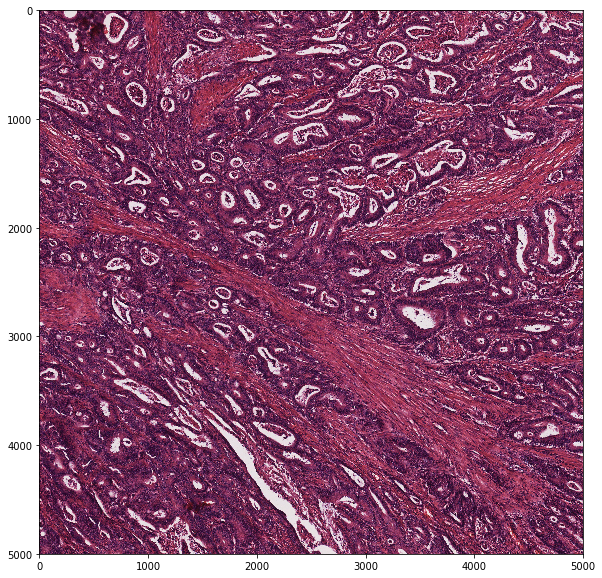

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(big_image_df['image'].iloc[1])
plt.show()

# Baseline models with 28x28 gray images

In [24]:
from sklearn.model_selection import train_test_split
sample_id_count = list(all_df_dict.values())[0].shape[0]
train_ids, test_ids = train_test_split(range(sample_id_count), 
                                       test_size=0.25, 
                                       random_state=2018)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_models(in_model_maker):
    fig, m_axs = plt.subplots(1, 5, figsize = (25, 5))
    for c_ax, c_key in zip(m_axs, all_df_dict.keys()):
        # c_key is for example HTCP_8_8_L (the file/type name)
        c_df = all_df_dict[c_key].copy()
        c_label = c_df.pop('label') # return column and drop from dataframe
        c_model = in_model_maker() # function of the model
        c_model.fit(c_df.iloc[train_ids, :], c_label.iloc[train_ids]) # fit of the model
        c_pred = c_model.predict(c_df.iloc[test_ids, :]) # prediction
        sns.heatmap(confusion_matrix(c_label.iloc[test_ids], c_pred), 
                    annot=True, cbar=False, fmt='d', ax=c_ax)
        c_ax.set_title(f'Accuracy: {accuracy_score(c_label[test_ids],c_pred)*100:2.2f}%\n{c_key}')

### Neireast neighbor

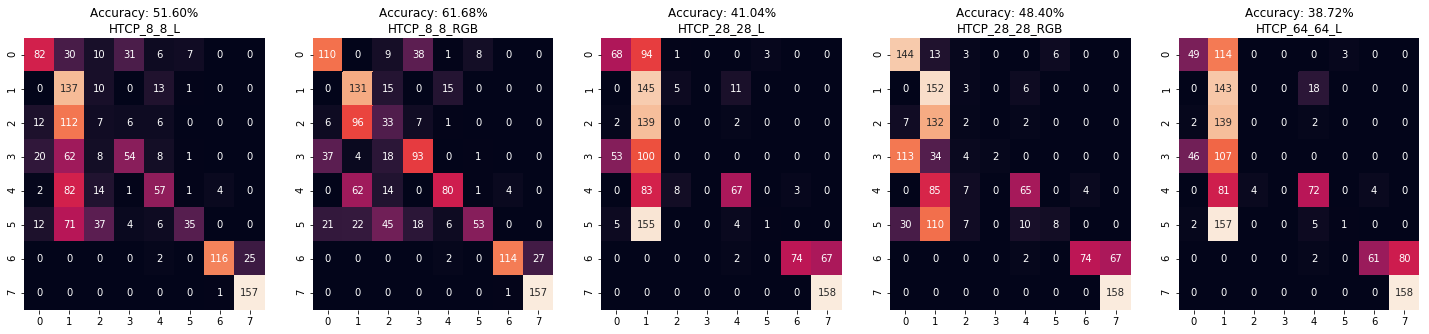

In [26]:
from sklearn.neighbors import KNeighborsClassifier
evaluate_models(lambda : KNeighborsClassifier(n_jobs=4))

### Logistic regression

/Users/tarrade/anaconda3/envs/env_ml_dl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/tarrade/anaconda3/envs/env_ml_dl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/tarrade/anaconda3/envs/env_ml_dl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/tarrade/anaconda3/envs/env_ml_dl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class op

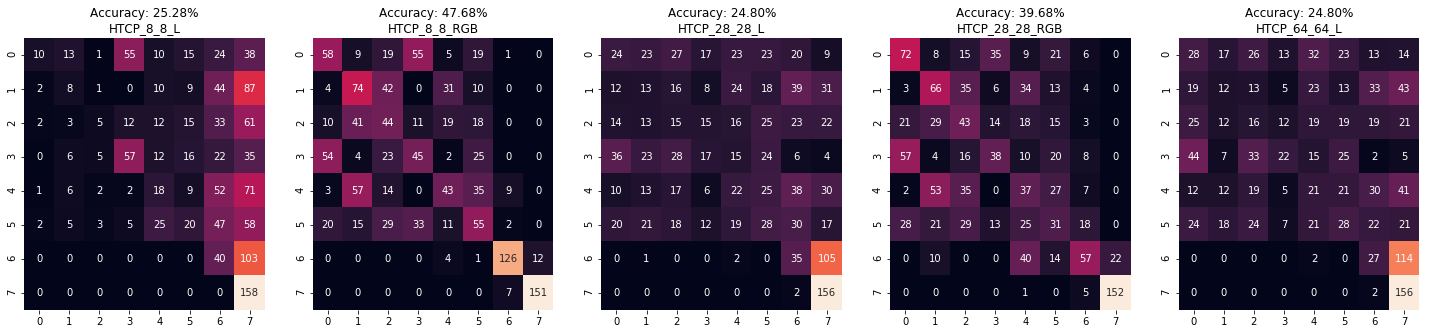

In [27]:
from sklearn.linear_model import LogisticRegression
evaluate_models(lambda : LogisticRegression(n_jobs=4, solver='lbfgs'))

### Random Forest classifiert

/Users/tarrade/anaconda3/envs/env_ml_dl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tarrade/anaconda3/envs/env_ml_dl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tarrade/anaconda3/envs/env_ml_dl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tarrade/anaconda3/envs/env_ml_dl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

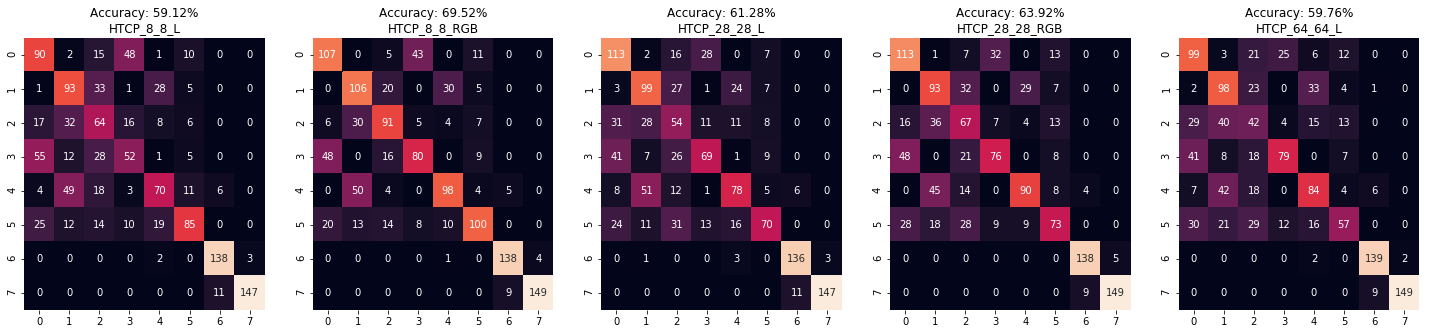

In [28]:
from sklearn.ensemble import RandomForestClassifier
evaluate_models(lambda : RandomForestClassifier(n_jobs=4))

# Example of a network with 4 layers, each with 10 neurons

In [29]:
class PrintProgress(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('Epoch', epoch)
        
class NBatchLogger(keras.callbacks.Callback):
    """
    A Logger that log average performance per `display` steps.
    """
    def __init__(self, display):
        self.step = 0
        self.display = display
        self.metric_cache = {}

    def on_batch_end(self, batch, logs={}):
        self.step += 1
        for k in self.params['metrics']:
            if k in logs:
                self.metric_cache[k] = self.metric_cache.get(k, 0) + logs[k]
        if self.step % self.display == 0:
            metrics_log = ''
            for (k, v) in self.metric_cache.items():
                val = v / self.display
                if abs(val) > 1e-3:
                    metrics_log += ' - %s: %.4f' % (k, val)
                else:
                    metrics_log += ' - %s: %.4e' % (k, val)
            print('step: {}/{} ... {}'.format(self.step,
                                          self.params['steps'],
                                          metrics_log))
            self.metric_cache.clear()

tf.keras.backend.clear_session()

In [30]:
c_df = all_df_dict['HTCP_28_28_L'].copy()
c_label = c_df.pop('label')

In [31]:
X_train = c_df.iloc[train_ids, :]
y_train = c_label.iloc[train_ids]-1

X_test = c_df.iloc[test_ids, :]
ytest = c_label.iloc[test_ids]-1

In [32]:
X_train.shape

(3750, 784)

In [33]:
# convert class vectors to binary class matrices One Hot Encoding
num_of_classes = 8
y_train = keras.utils.to_categorical(y_train, num_of_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.1, random_state=42)

X_train = X_train / 255.0 / 1.0
X_val = X_val / 255.0 / 1.0

In [34]:
n = 15
# Network building Phase
model = tf.keras.Sequential()
model.add(layers.Dense(n, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(n, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(num_of_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.train.AdamOptimizer(0.01),
              metrics=['accuracy'])
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
__________

In [35]:
out_batch = NBatchLogger(display=1000)
model.fit(X_train, Y_train, epochs=1000, batch_size=250,verbose = 0,
             callbacks=[out_batch])

step: 1000/None ...  - loss: 1.4579 - acc: 0.3496
step: 2000/None ...  - loss: 1.3332 - acc: 0.3905
step: 3000/None ...  - loss: 1.3038 - acc: 0.4017
step: 4000/None ...  - loss: 1.2890 - acc: 0.4079
step: 5000/None ...  - loss: 1.2728 - acc: 0.4137
step: 6000/None ...  - loss: 1.2708 - acc: 0.4133
step: 7000/None ...  - loss: 1.2724 - acc: 0.4132
step: 8000/None ...  - loss: 1.2505 - acc: 0.4195
step: 9000/None ...  - loss: 1.2438 - acc: 0.4215
step: 10000/None ...  - loss: 1.2439 - acc: 0.4232
step: 11000/None ...  - loss: 1.2458 - acc: 0.4195
step: 12000/None ...  - loss: 1.2327 - acc: 0.4266
step: 13000/None ...  - loss: 1.2299 - acc: 0.4258
step: 14000/None ...  - loss: 1.2324 - acc: 0.4251


In [36]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=1)
pred = model.predict_classes(X_val)
pred_train = model.predict_classes(X_train)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

375/375 [==============================] - 0s 644us/step
Final loss: 1.456036, final accuracy: 0.304000


# Confusion Matrix for training

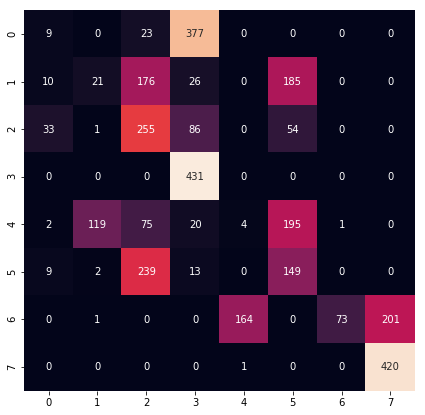

In [37]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(np.argmax(Y_train, axis = 1), pred_train), 
                    annot=True, cbar=False, fmt='d', ax=ax)

# Confusion Matrix for dev

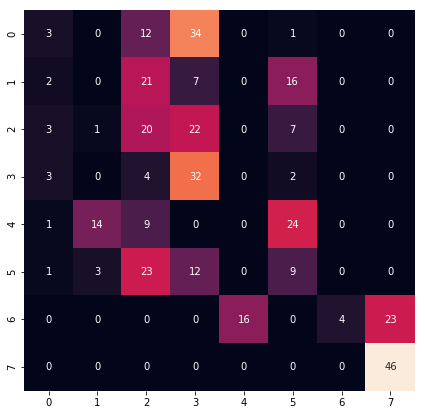

In [38]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(np.argmax(Y_val, axis = 1), pred), 
                    annot=True, cbar=False, fmt='d', ax=ax)

# CNN

In [39]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
# Reshape it into [num_images, img_height, img_width, num_channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Placeholder variable for the true labels associated with the images
y_true = tf.placeholder(tf.float32, shape=[None, 8], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)

In [40]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters):
    
        # Shape of the filter-weights for the convolution
    shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights (filters) with the given shape
    weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
    biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))

        # TensorFlow operation for convolution
    layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

        # Add the biases to the results of the convolution.
    layer += biases
        
    return layer, weights

In [41]:
def new_pool_layer(input):
    
        # TensorFlow operation for convolution
    layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
    return layer

In [42]:
def new_relu_layer(input):
    
    #with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
    layer = tf.nn.relu(input)
        
    return layer

In [43]:
def new_fc_layer(input, num_inputs, num_outputs):
         # Create new weights and biases.
    weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
    biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases
        
    return layer

In [44]:
# Convolutional Layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=32) # 6

# Pooling Layer 1
layer_pool1 = new_pool_layer(layer_conv1)

# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1)

# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=32, filter_size=5, num_filters=32)

# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2)

# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2)

# Flatten Layer
num_features = layer_relu2.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu2, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128)

# RelU layer 3
layer_relu3 = new_relu_layer(layer_fc1)

# Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_relu3, num_inputs=128, num_outputs=8)

In [45]:
# Use Softmax function to normalize the output
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, axis=1)

In [46]:
# Use Cross entropy cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [47]:
# Use Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

In [48]:
# Accuracy
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [49]:
num_epochs = 100
batch_size = 30

In [50]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [51]:
print ("Training the model for", num_epochs, "epochs.")
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    #writer.add_graph(sess.graph)
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        
        #for batch in range(0, int(len(labels_)/batch_size)):
        # X_train, Y_train
        # X_val, Y_val,
            
        for i in range(0, X_train.shape[0], batch_size):
            #if (i%1000 == 0):
            #    print('-->',i)
            x_batch = X_train[i:i + batch_size,:]
            y_true_batch = Y_train[i:i + batch_size,:]
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            sess.run(optimizer, feed_dict=feed_dict_train)
            
        train_accuracy = sess.run(accuracy, feed_dict={x:X_train, y_true:Y_train})
        
        # Generate summary and validate the model on the entire validation set
        vali_accuracy = sess.run(accuracy, feed_dict={x:X_val, y_true:Y_val})
        #writer1.add_summary(summ, epoch)
        

        end_time = time.time()
        
        if (epoch % 5 == 0):
            print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
            print("\tAccuracy:")
            print ("\t- Training Accuracy:\t{}".format(train_accuracy))
            print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))
            
    pred = sess.run(y_pred_cls, feed_dict={x:X_train, y_true:Y_train})
            
print("\n\nFinal Accuracy:")
print ("- Training Accuracy:\t{}".format(train_accuracy))
print ("- Validation Accuracy:\t{}".format(vali_accuracy))

Training the model for 100 epochs.
Epoch 1 completed : Time usage 6 seconds
	Accuracy:
	- Training Accuracy:	0.40296295285224915
	- Validation Accuracy:	0.36800000071525574
Epoch 6 completed : Time usage 4 seconds
	Accuracy:
	- Training Accuracy:	0.5777778029441833
	- Validation Accuracy:	0.5493333339691162
Epoch 11 completed : Time usage 4 seconds
	Accuracy:
	- Training Accuracy:	0.6477037072181702
	- Validation Accuracy:	0.6159999966621399
Epoch 16 completed : Time usage 4 seconds
	Accuracy:
	- Training Accuracy:	0.7348148226737976
	- Validation Accuracy:	0.6746666431427002
Epoch 21 completed : Time usage 4 seconds
	Accuracy:
	- Training Accuracy:	0.7694814801216125
	- Validation Accuracy:	0.7013333439826965
Epoch 26 completed : Time usage 4 seconds
	Accuracy:
	- Training Accuracy:	0.8251851797103882
	- Validation Accuracy:	0.7120000123977661
Epoch 31 completed : Time usage 5 seconds
	Accuracy:
	- Training Accuracy:	0.8648889064788818
	- Validation Accuracy:	0.7066666483879089
Epoch 

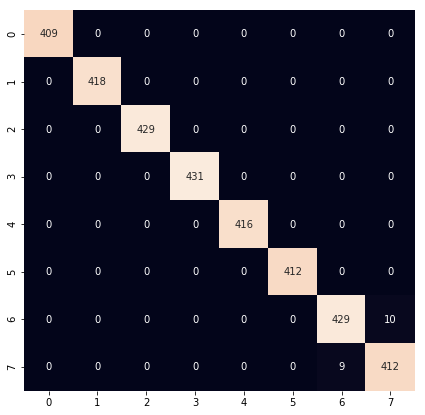

In [52]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(confusion_matrix(np.argmax(Y_train, axis = 1), pred), 
                    annot=True, cbar=False, fmt='d', ax=ax)